## LangGraph



In [1]:
# 환경 변수 
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
!pip install -q langchain_community
# !pip install -q langchain-ollama
!pip install -q langgraph
!pip install -q langchain-anthropic



In [7]:
from ollama import list
from ollama import ListResponse

response: ListResponse = list()

for model in response.models:
  print('Name:', model.model)

Name: llama3.2-vision:latest
Name: EEVE-Korean-Q5_K_M:latest
Name: llama3.2:latest


In [6]:
model_name = "llama3.2"

In [4]:
## test add_messages

from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages

# 기본 사용 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [AIMessage(content="반갑습니다~", id="2")]
msgs3 = [HumanMessage(content="안녕하222세요?", id="1")]
result1 = add_messages(msgs1, msgs2)
result2 = add_messages(result1, msgs3)
print(result2)

[HumanMessage(content='안녕하222세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]


In [8]:
from langchain_ollama.llms import OllamaLLM

llm = OllamaLLM(model=model_name)

In [9]:
from langchain_core.prompts import ChatPromptTemplate


template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

chain = prompt | llm


In [10]:
chain.invoke({"question": "What is LangChain?"})

'1. First, let\'s understand that "LangChain" might be a misspelling of "Langchain," which is not a known term or concept on its own. However, there is another concept called "Language Chain (LangChain)," which may be what you are looking for.\n\n2. The Language Chain, also known as the Language Understanding and Information Retrieval Engine (LUIRA) or simply LUIR, is a natural language processing (NLP) engine developed by IBM in the 1980s. It was designed to understand user queries and retrieve relevant information from databases.\n\n3. LangChain is an open-source framework that aims to simplify the development of decentralized applications (dApps) using blockchain technology, artificial intelligence (AI), and natural language processing (NLP). It provides a set of pre-built components and tools that can be easily combined and customized to create complex dApps without requiring extensive knowledge of these technologies.\n\n4. In summary, if you were asking about the term "LangChain,"

In [40]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("answer is korean", id="1"),
    HumanMessage("현재 시간은!", id="2"),
]
print(f"--> messages : {messages}")
print(f"--> messages type : {type(messages)}")
response = chain.invoke(messages)



🕒 현재 시간: 2024-11-28 15:09:00
--> messages : [SystemMessage(content='answer is korean', additional_kwargs={}, response_metadata={}, id='1'), HumanMessage(content='현재 시간은!', additional_kwargs={}, response_metadata={}, id='2')]
--> messages type : <class 'list'>
⏳ 실행 시간: 31.65초


In [41]:
print(response)

🕒 현재 시간: 2024-11-28 15:09:35
Step 1: Understand the context of the question.
The given text appears to be a list of message objects, which consists of two messages - one labeled "SystemMessage" and another labeled "HumanMessage." These messages are meant for processing by an AI assistant like myself.

Step 2: Analyze the content of each message.
- SystemMessage(content='answer is korrea', additional_kwargs={}, response_metadata={}, id='1'): This message has the content "answer is korrea" and no additional keywords or response metadata. We can assume that it's a question, but it may have some spelling mistakes.
- HumanMessage(content='현재 시간은!' additional_kwargs={}, response_metadata={}, id='2'): This message simply states, "현재 시간은!" which translates to "What time is it now?" in English. It seems like a request for the current time.

Step 3: Combine both messages for clarity and provide an answer.
Since the first message appears to be a question but has spelling mistakes, we can assume t

In [20]:
from typing import Annotated, Any, List

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class TestState(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[List[Any], add_messages]
        #  messages: list



🕒 현재 시간: 2024-11-28 12:28:54
⏳ 실행 시간: 0.00초


In [42]:
from langchain_core.messages import HumanMessage, SystemMessage

def chatbot(state: TestState) -> TestState:
    # print(f"--> chatbot : start state: {state}")
    print(f"--> messages : {type(state['messages'])}")
    print(f"--> messages : {state['messages']}")

    response = chain.invoke(state['messages'])

    print(f"--> chatbot : after chain.invoke : {response}")
    # Create an AIMessage instead of returning raw response
    from langchain_core.messages import AIMessage
    return {"messages": [AIMessage(content=str(response))]}

🕒 현재 시간: 2024-11-28 15:11:02
⏳ 실행 시간: 0.08초


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

def search_wikipedia(state: TestState) -> TestState:
    # print(f"--> chatbot : start state: {state}")
    print(f"--> messages : {type(state['messages'])}")
    print(f"--> messages : {state['messages']}")

    response = chain.invoke(state['messages'])

    print(f"--> chatbot : after chain.invoke : {response}")
    # Create an AIMessage instead of returning raw response
    from langchain_core.messages import AIMessage
    return {"messages": [AIMessage(content=str(response))]}

🕒 현재 시간: 2024-11-28 15:11:04


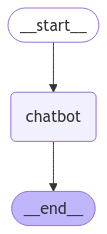

⏳ 실행 시간: 1.00초


In [43]:

try:
    del graph_builder
except NameError:
    pass
graph_builder = StateGraph(TestState)

# query -> retrieve_document -> eval document  response
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [31]:
# stream_graph_updates 함수는 사용자의 입력을 받아 그래프를 통해 응답을 스트리밍하는 함수입니다
def stream_graph_updates(user_input: str):
    # graph.stream()을 사용하여 사용자 입력을 그래프에 전달하고 응답을 스트리밍합니다
    # {"messages": [("user", user_input)]} 형태로 입력을 포맷팅합니다
    for event in graph.stream({"messages": [("user", user_input)]}):
        # 각 이벤트에서 값을 추출하여 출력합니다
        for value in event.values():
            # Assistant: 프리픽스와 함께 메시지의 마지막 컨텐츠를 출력합니다
            print("Assistant:", value["messages"][-1].content)


# 메인 대화 루프입니다
while True:
    try:
        # 사용자로부터 입력을 받습니다
        user_input = input("User: ")
        
        # 종료 명령어를 확인합니다 (quit, exit, q)
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        # 사용자 입력을 처리하여 응답을 생성합니다
        stream_graph_updates(user_input)
    except:
        # input() 함수를 사용할 수 없는 경우의 대체 로직입니다
        # 기본 질문으로 "What do you know about LangGraph?"를 사용합니다
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

🕒 현재 시간: 2024-11-28 12:13:56


In [ ]:

# stream_graph_updates 함수는 사용자의 입력을 받아 그래프를 통해 응답을 스트리밍하는 함수입니다
def stream_graph_updates(user_input: str):
    # graph.stream()을 사용하여 사용자 입력을 그래프에 전달하고 응답을 스트리밍합니다
    # {"messages": [("user", user_input)]} 형태로 입력을 포맷팅합니다
    for event in graph.stream({"messages": [("user", user_input)]}):
        # 각 이벤트에서 값을 추출하여 출력합니다
        for value in event.values():
            # Assistant: 프리픽스와 함께 메시지의 마지막 컨텐츠를 출력합니다
            print("Assistant:", value["messages"][-1].content)




# 사용자 입력을 처리하여 응답을 생성합니다
stream_graph_updates("너는 누구야?")
  

In [35]:
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(recursion_limit=10)

inputs = State(messages="현재 시간은?")
outputs = graph.invoke(inputs, config)

print(outputs)

🕒 현재 시간: 2024-11-28 15:05:20
--> messages : <class 'list'>
--> messages : [HumanMessage(content='현재 시간은?', additional_kwargs={}, response_metadata={}, id='da3b46ed-a651-45d4-a1e2-d64841f2bc5e')]
--> chatbot : after llm.invoke : 현재 시간은 다음과 같습니다: [날짜, 시간 포맷팅 규칙에 따라 현재 날짜와 시간을 표시합니다]
{'messages': [HumanMessage(content='현재 시간은?', additional_kwargs={}, response_metadata={}, id='da3b46ed-a651-45d4-a1e2-d64841f2bc5e'), AIMessage(content='현재 시간은 다음과 같습니다: [날짜, 시간 포맷팅 규칙에 따라 현재 날짜와 시간을 표시합니다]', additional_kwargs={}, response_metadata={}, id='f7ff2f24-6e70-4b00-abeb-e76ee07443f0')]}
⏳ 실행 시간: 15.82초
